<a href="https://colab.research.google.com/github/lyj041214/ESAA/blob/main/HW_0321.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[개념 정리]

##datetime 오브젝트

date, time, datetime 오브젝트 포함
* datetime 오브젝트로 시간 계산 가능
* to_datetime 메서드
* 날짜를 시리즈에 담아 datetime 오브젝트로 변환
* datetime 오브젝트의 year,month,day 속성 이용 -> 년,월,일 정보 추출
* dt 접근자로 시계열 데이터 정리

## 사례별 데이터 계산
* pandas-datareader 라이브러리 이용하여 주식 데이터 불러오기
* datetime 오브젝트를 데이터프레임의 인덱스로 설정 가능
* 시간 범위를 생성해서 인덱스로 지정 가능 ex) pd.date_range(start='2014-12-31',end='2015-01-03')
* 시간 범위 수정하고 데이터 밀어내기 -> shift 메서드

#[코드 필사]

In [96]:
from datetime import datetime

In [3]:
now1=datetime.now()
print(now1)

2025-03-24 04:18:54.842903


In [4]:
now2=datetime.today()
print(now2)

2025-03-24 04:18:54.850571


In [5]:
t1=datetime.now()
t2=datetime(1970,1,1)
t3=datetime(1970,12,12,13,24,34)

print(t1)
print(t2)
print(t3)

2025-03-24 04:18:54.857831
1970-01-01 00:00:00
1970-12-12 13:24:34


In [6]:
diff1=t1-t2
print(diff1)
print(type(diff1))

20171 days, 4:18:54.857831
<class 'datetime.timedelta'>


In [7]:
diff2=t2-t1
print(diff2)
print(type(diff2))

-20172 days, 19:41:05.142169
<class 'datetime.timedelta'>


In [8]:
import pandas as pd
import os

ebola=pd.read_csv('country_timeseries.csv')

In [9]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [10]:
ebola['date_dt']=pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [11]:
test_df1=pd.DataFrame({'order_day':['01/01/15','02/01/15','03/01/15']})

test_df1['date_dt1']=pd.to_datetime(test_df1['order_day'],format='%d/%m/%y')
test_df1['date_dt2']=pd.to_datetime(test_df1['order_day'],format='%m/%d/%y')
test_df1['date_dt3']=pd.to_datetime(test_df1['order_day'],format='%y/%m/%d')

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [12]:
test_df2=pd.DataFrame({'order_day':['01-01-15','02-01-15','03-01-15']})
test_df2['date_dt']=pd.to_datetime(test_df2['order_day'],format='%d-%m-%y')

print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


In [13]:
now=datetime.now()
print(now)

2025-03-24 04:18:55.557519


In [14]:
nowDate=now.strftime('%Y-%m-%d')
print(nowDate)

2025-03-24


In [15]:
nowTime=now.strftime('%H:%M:%S')
print(nowTime)

04:18:55


In [16]:
nowDatetime=now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2025-03-24 04:18:55


In [17]:
ebola1=pd.read_csv('country_timeseries.csv',parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [18]:
data_series=pd.Series(['2018-05-16','2018-05-17','2018-05-18'])
d1=pd.to_datetime(data_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [19]:
print(d1[0].year)

2018


In [20]:
print(d1[0].month)

5


In [21]:
print(d1[0].day)

16


In [22]:
ebola=pd.read_csv('country_timeseries.csv')
ebola['date_dt']=pd.to_datetime(ebola['Date'])

In [23]:
print(ebola[['Date','date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [24]:
print(ebola['date_dt'][3].year)

2015


In [25]:
print(ebola['date_dt'][3].month)

1


In [26]:
print(ebola['date_dt'][3].day)

2


In [27]:
ebola['year']=ebola['date_dt'].dt.year

print(ebola[['Date','date_dt','year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [28]:
ebola['month'],ebola['day']=(ebola['date_dt'].dt.month,ebola['date_dt'].dt.day)
print(ebola[['Date','date_dt','year','month','day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


In [29]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [30]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [31]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [32]:
ebola['outbreak_d']=ebola['date_dt']-ebola['date_dt'].min()
print(ebola[['Date','Day','date_dt','outbreak_d']].head())

         Date  Day    date_dt outbreak_d
0    1/5/2015  289 2015-01-05   289 days
1    1/4/2015  288 2015-01-04   288 days
2    1/3/2015  287 2015-01-03   287 days
3    1/2/2015  286 2015-01-02   286 days
4  12/31/2014  284 2014-12-31   284 days


In [33]:
banks=pd.read_csv('banklist.csv')
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


In [34]:
banks_no_dates=pd.read_csv('banklist.csv')
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None


In [35]:
banks=pd.read_csv('banklist.csv',parse_dates=[5,6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


<ipython-input-35-bb4f9fb0f123>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks=pd.read_csv('banklist.csv',parse_dates=[5,6])
<ipython-input-35-bb4f9fb0f123>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks=pd.read_csv('banklist.csv',parse_dates=[5,6])


In [36]:
banks['closing_quarter'],banks['closing_year']=banks['Closing Date'].dt.quarter,banks['Closing Date'].dt.year
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

In [37]:
closing_year=banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [38]:
closing_year_q=banks.groupby(['closing_year','closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

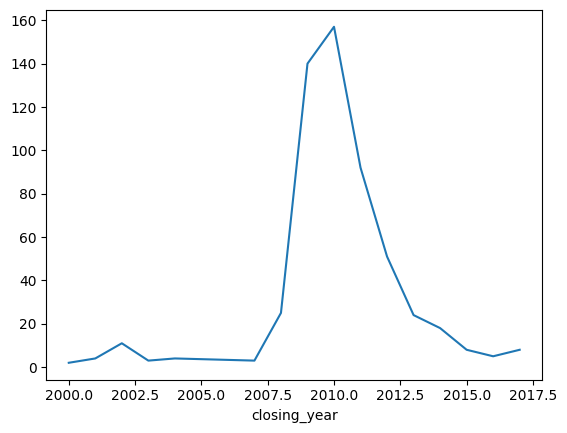

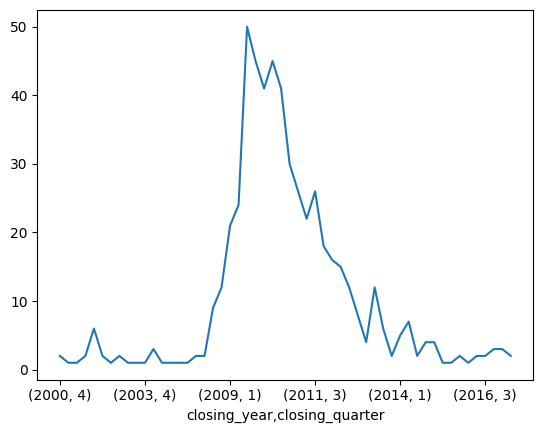

In [39]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax=closing_year.plot()
plt.show()

fig,ax=plt.subplots()
ax=closing_year_q.plot()
plt.show()

In [40]:
pip install pandas-datareader

In [51]:
pd.core.common.is_list_like=pd.api.types.is_list_like
import pandas_datareader as pdr

tesla=pd.read_csv('tesla_stock_quandl.csv')
#tesla에 저장된 데이터프레임을 파일로 저장합니다.
tesla.to_csv('tesla_stock_quandl.csv')

In [52]:
print(tesla.head())

         Date    Open    High     Low   Close      Volume  ExDividend  \
0  2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
1  2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2  2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
3  2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
4  2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

   SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
0         1.0   304.00   304.27  277.18    279.18  13696168.0  
1         1.0   307.34   307.59  291.36    304.18   8324639.0  
2         1.0   311.25   311.61  300.45    301.54   6600538.0  
3         1.0   313.89   318.82  308.18    309.10   4914307.0  
4         1.0   310.25   322.44  310.19    316.53   5927881.0  


In [59]:
tesla=pd.read_csv('tesla_stock_quandl.csv',parse_dates=[0])
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1949 non-null   object 
 1   Date        1949 non-null   object 
 2   Open        1949 non-null   float64
 3   High        1949 non-null   float64
 4   Low         1949 non-null   float64
 5   Close       1949 non-null   float64
 6   Volume      1949 non-null   float64
 7   ExDividend  1949 non-null   float64
 8   SplitRatio  1949 non-null   float64
 9   AdjOpen     1949 non-null   float64
 10  AdjHigh     1949 non-null   float64
 11  AdjLow      1949 non-null   float64
 12  AdjClose    1949 non-null   float64
 13  AdjVolume   1949 non-null   float64
dtypes: float64(12), object(2)
memory usage: 213.3+ KB
None


<ipython-input-59-4b6821bbeaf2>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tesla=pd.read_csv('tesla_stock_quandl.csv',parse_dates=[0])


In [60]:
# Date 열이 문자열이라면 datetime으로 변환
tesla["Date"] = pd.to_datetime(tesla["Date"])
print(tesla.loc[(tesla.Date.dt.year==2010)&(tesla.Date.dt.month==6)])

     Unnamed: 0       Date   Open     High    Low  Close      Volume  \
1947       1947 2010-06-30  25.79  30.4192  23.30  23.83  17187100.0   
1948       1948 2010-06-29  19.00  25.0000  17.54  23.89  18766300.0   

      ExDividend  SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
1947         0.0         1.0    25.79  30.4192   23.30     23.83  17187100.0  
1948         0.0         1.0    19.00  25.0000   17.54     23.89  18766300.0  


In [66]:
tesla.index=tesla['Date']
print(tesla.index)

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2010-07-13', '2010-07-12', '2010-07-09', '2010-07-08',
               '2010-07-07', '2010-07-06', '2010-07-02', '2010-07-01',
               '2010-06-30', '2010-06-29'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)


In [67]:
print(tesla.loc['2015'].iloc[:5, :5])

           Unnamed: 0       Date    Open     High       Low
Date                                                       
2015-12-31        561 2015-12-31  238.51  243.450  238.3700
2015-12-30        562 2015-12-30  236.60  243.634  235.6707
2015-12-29        563 2015-12-29  230.06  237.720  229.5470
2015-12-28        564 2015-12-28  231.49  231.980  225.5400
2015-12-24        565 2015-12-24  230.56  231.880  228.2800


In [69]:
print(tesla.loc['2010-06'].iloc[:,:5])

           Unnamed: 0       Date   Open     High    Low
Date                                                   
2010-06-30       1947 2010-06-30  25.79  30.4192  23.30
2010-06-29       1948 2010-06-29  19.00  25.0000  17.54


In [70]:
tesla['ref_date']=tesla['Date']-tesla['Date'].min()
print(tesla.head())

           Unnamed: 0       Date    Open    High     Low   Close      Volume  \
Date                                                                           
2018-03-27          0 2018-03-27  304.00  304.27  277.18  279.18  13696168.0   
2018-03-26          1 2018-03-26  307.34  307.59  291.36  304.18   8324639.0   
2018-03-23          2 2018-03-23  311.25  311.61  300.45  301.54   6600538.0   
2018-03-22          3 2018-03-22  313.89  318.82  308.18  309.10   4914307.0   
2018-03-21          4 2018-03-21  310.25  322.44  310.19  316.53   5927881.0   

            ExDividend  SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose  \
Date                                                                     
2018-03-27         0.0         1.0   304.00   304.27  277.18    279.18   
2018-03-26         0.0         1.0   307.34   307.59  291.36    304.18   
2018-03-23         0.0         1.0   311.25   311.61  300.45    301.54   
2018-03-22         0.0         1.0   313.89   318.82  308.18    309.1

In [71]:
tesla.index=tesla['ref_date']
print(tesla.iloc[:5,:5])

          Unnamed: 0       Date    Open    High     Low
ref_date                                               
2828 days          0 2018-03-27  304.00  304.27  277.18
2827 days          1 2018-03-26  307.34  307.59  291.36
2824 days          2 2018-03-23  311.25  311.61  300.45
2823 days          3 2018-03-22  313.89  318.82  308.18
2822 days          4 2018-03-21  310.25  322.44  310.19


In [72]:
print(tesla['5 days':].iloc[:5,:5])

         Unnamed: 0       Date   Open     High    Low
ref_date                                             
3 days         1945 2010-07-02  23.00  23.1000  18.71
2 days         1946 2010-07-01  25.00  25.9200  20.27
1 days         1947 2010-06-30  25.79  30.4192  23.30
0 days         1948 2010-06-29  19.00  25.0000  17.54


In [73]:
ebola=pd.read_csv('country_timeseries.csv',parse_dates=[0])
print(ebola.iloc[:5,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [74]:
print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [75]:
head_range=pd.date_range(start='2014-12-31',end='2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [76]:
ebola_5=ebola.head()
ebola_5.index=ebola_5['Date']
ebola_5.reindex(head_range)
print(ebola_5.iloc[:5,:5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


In [77]:
print(pd.date_range('2017-01-01','2017-01-07',freq='B'))

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')


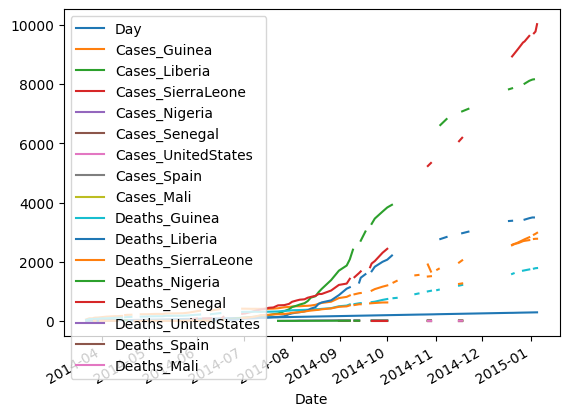

In [78]:
import matplotlib.pyplot as plt
ebola.index=ebola['Date']
fig,ax=plt.subplots()
ax=ebola.iloc[0:,1:].plot(ax=ax)

In [79]:
ebola_sub=ebola[['Day','Cases_Guinea','Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


In [80]:
ebola=pd.read_csv('country_timeseries.csv',parse_dates=['Date'])

In [81]:
print(ebola.head().iloc[:,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [82]:
print(ebola.tail().iloc[:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [83]:
ebola.index=ebola['Date']
new_idx=pd.date_range(ebola.index.min(),ebola.index.max())
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [84]:
new_idx=reversed(new_idx)

In [85]:
print(ebola.head().iloc[:,:5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


In [86]:
print(ebola.tail().iloc[:,:5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-27 2014-03-27    5         103.0            8.0                6.0
2014-03-26 2014-03-26    4          86.0            NaN                NaN
2014-03-25 2014-03-25    3          86.0            NaN                NaN
2014-03-24 2014-03-24    2          86.0            NaN                NaN
2014-03-22 2014-03-22    0          49.0            NaN                NaN


In [87]:
last_valid=ebola.apply(pd.Series.last_valid_index)
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [88]:
first_valid=ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]


In [89]:
earliest_date=ebola.index.min()
print(earliest_date)

2014-03-22 00:00:00


In [90]:
shift_values=last_valid-earliest_date
print(shift_values)

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [91]:
ebola_dict={}
for idx,col in enumerate(ebola):
  d=shift_values[idx].days
  shifted=ebola[col].shift(d)
  ebola_dict[col]=shifted

<ipython-input-91-b0425007339e>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d=shift_values[idx].days


In [92]:
ebola_shift=pd.DataFrame(ebola_dict)

In [93]:
print(ebola_shift.tail())

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-27 2014-03-27    5         103.0           18.0                2.0   
2014-03-26 2014-03-26    4          86.0            8.0                2.0   
2014-03-25 2014-03-25    3          86.0            8.0                2.0   
2014-03-24 2014-03-24    2          86.0            7.0                NaN   
2014-03-22 2014-03-22    0          49.0            3.0                2.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-27            NaN            NaN                 NaN          NaN   
2014-03-26            NaN            NaN                 NaN          NaN   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN        

In [94]:
ebola_shift.index=ebola_shift['Day']
ebola_shift=ebola_shift.drop(['Date','Day'],axis=1)

print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
5           103.0           18.0                2.0            NaN   
4            86.0            8.0                2.0            NaN   
3            86.0            8.0                2.0            NaN   
2            86.0            7.0                NaN            NaN   
0            49.0            3.0                2.0            NaN   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
5              NaN                 NaN          NaN         NaN   
4              NaN                 NaN          NaN         NaN   
3              NaN                 NaN          NaN         NaN   
2              NaN                 NaN          NaN         NaN   
0              NaN                 NaN          NaN         NaN   

     Deaths_Guinea  Deaths_Liberia  Dea

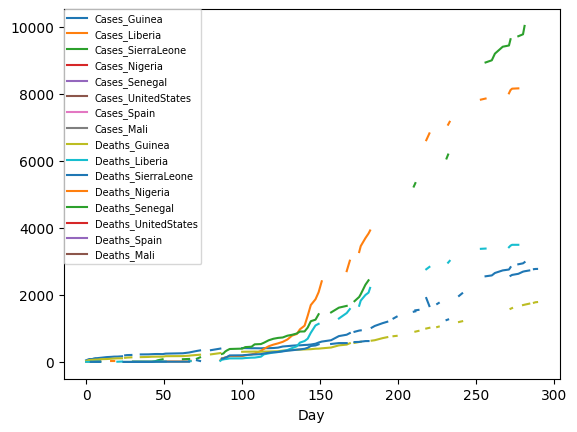

In [95]:
fig,ax=plt.subplots()
ax=ebola_shift.iloc[:,:].plot(ax=ax)
ax.legend(fontsize=7,loc=2,borderaxespad=0)
plt.show()